**Importing Libraries**

In [187]:
import pandas as pd
import seaborn as sb

import string
import warnings
import math

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk import FreqDist

In [2]:
warnings.filterwarnings("ignore")

In [152]:
movie_data = pd.read_csv("dataset/Oppenhimer_Cleaned_Reviews.csv")

**Getting info about the data**

In [153]:
movie_data.head()

,text,rating
0,"A challenging watch to be sure, but a worthwhi...",8
1,A brilliantly layered examination of a man thr...,1
2,Nolan delivers a powerfull biopic that shows t...,1
3,A Masterpiecemohameddawoud-2601919 July 2023I ...,1
4,And the Oscar goes to...mark-217-30703319 July...,1


In [154]:
movie_data.tail()

,text,rating
84043,"Huge story, but production fails sometimesandr...",7
84044,Tweakedfmacr25 July 2023I suppose these review...,6
84045,Just a 6 for a near perfect film.m-nicolaou-86...,6
84046,No need to be 3 hoursscottahaynie24 July 2023A...,6
84047,Disappointingkrisdevos22 July 2023Totally unde...,6


In [155]:
movie_data.sample(5)

,text,rating
46244,This is the best movie I have ever seen. Nothi...,1
69752,Perfect 👌profdrdawodsulaimanali20 July 2023War...,1
69440,Movie of the year no doubtFiL1m21 July 2023Thi...,9
15126,"Distinctive, mesmerizing, and unwieldysonichez...",9
13525,"""Prometheus stole fire from the gods and gave ...",9


In [156]:
movie_data.shape

(84048, 2)

In [157]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84048 entries, 0 to 84047
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    84048 non-null  object
 1   rating  84048 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [158]:
movie_data.describe()

,text,rating
count,84048,84048
unique,2036,21
top,Cinematic Masterpiecedeenkhalil21 July 2023Opp...,1
freq,131,41736


In [159]:
movie_data.isnull().sum()

text      0
rating    0
dtype: int64

*There are no null values in the dataframe.*

In [160]:
movie_data.duplicated().sum()

82012

In [161]:
movie_data.drop_duplicates(inplace=True)

*There was some duplicate values in the dataframe. Dropped them and now the dataframe dosen't contain any duplicate values.*

In [163]:
movie_data.shape

(2036, 2)

**Checking "rating" column and cleaning it**

In [164]:
movie_data["rating"].unique()

array(['8', '1', '9', '7', '5', 'M', '6', 'O', '4', 'B', 'E', 'S', 'I',
       '3', 'T', '2', 'A', 'D', 'G', 'C', 'J'], dtype=object)

*There are some categorical values in "rating" column, so changing them to mean of the "rating" column*

*Lets replace all the categorical values to 10*

In [165]:
# function to replace categorical values of "rating" column to -1
def clean_rating_column(rating):
    if rating in string.ascii_uppercase:
        return 10
    return rating

movie_data["rating"] = movie_data["rating"].apply(clean_rating_column)

movie_data["rating"].unique()

array(['8', '1', '9', '7', '5', 10, '6', '4', '3', '2'], dtype=object)

In [166]:
movie_data.dtypes

text      object
rating    object
dtype: object

In [167]:
# changing the datatype of rating column to int
movie_data["rating"] = movie_data["rating"].astype(int)

In [168]:
movie_data.dtypes

text      object
rating     int32
dtype: object

*Now, "rating" column is clean. Lets create a separate column and divide all the ratings into three categories based on mean.*

In [169]:
# function to divide all the ratings into three categories
def divide_ratings_into_categories(rating):
    if rating < rating_mean - 1:
        return "Low"
    elif rating_mean - 1 <= rating <= rating_mean + 1:
        return "Medium"
    return "High"

movie_data["rating_category"] = movie_data["rating"].apply(divide_ratings_into_categories)

movie_data.head()

,text,rating,rating_category
0,"A challenging watch to be sure, but a worthwhi...",8,High
1,A brilliantly layered examination of a man thr...,1,Low
2,Nolan delivers a powerfull biopic that shows t...,1,Low
3,A Masterpiecemohameddawoud-2601919 July 2023I ...,1,Low
4,And the Oscar goes to...mark-217-30703319 July...,1,Low


*Checking the "text" column*

In [170]:
movie_data["text"][0]

"A challenging watch to be sure, but a worthwhile one.Jeremy_Urquhart20 July 2023One of the most anticipated films of the year for many people, myself included, Oppenheimer largely delivers. Much of it's great. I feel like I loved two of its three hours, and liked the other hour.... but it's that fact that stops me from adoring the entire thing. I know with Christopher Nolan's Dunkirk, that clicked on a second watch, so maybe Oppenheimer will need one too. That being said, I don't feel the need to rush out and see it again too soon, because it was a long and exhausting film.But in many ways, I can't deny it was an exceptionally well made one. It looks and sounds as amazing as you'd expect, feeling as though it accurately captures the time period it's set in, and containing amazing sound design and one of the year's best scores so far. Every performance is good to great, but the film belongs to Cillian Murphy, and I feel like he's the lead actor to beat at this stage, if we're talking (

In [171]:
# function to clean the text column
def clean_text_column(text):
    return "".join([i for i in text if i not in string.punctuation]).lower()

movie_data["text"] = movie_data["text"].apply(clean_text_column)

In [172]:
movie_data["text"].head()

0    a challenging watch to be sure but a worthwhil...
1    a brilliantly layered examination of a man thr...
2    nolan delivers a powerfull biopic that shows t...
3    a masterpiecemohameddawoud2601919 july 2023i m...
4    and the oscar goes tomark21730703319 july 2023...
Name: text, dtype: object

In [173]:
# removing stop words from "text" column
stop_words = stopwords.words("english")

movie_data["text"] = movie_data["text"].apply(lambda x: " ".join([i for i in x.split() if i not in stop_words]))

In [174]:
movie_data["text"].head()

0    challenging watch sure worthwhile onejeremyurq...
1    brilliantly layered examination man throughout...
2    nolan delivers powerfull biopic shows dark sid...
3    masterpiecemohameddawoud2601919 july 2023i may...
4    oscar goes tomark21730703319 july 2023im still...
Name: text, dtype: object

*Creating a column for "score" column based on "Polarity" and "Subjectivity" of the "text" column*

In [175]:
movie_data["score"] = movie_data["text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [176]:
movie_data.head()

,text,rating,rating_category,score
0,challenging watch sure worthwhile onejeremyurq...,8,High,0.259435
1,brilliantly layered examination man throughout...,1,Low,0.163493
2,nolan delivers powerfull biopic shows dark sid...,1,Low,0.297368
3,masterpiecemohameddawoud2601919 july 2023i may...,1,Low,0.234615
4,oscar goes tomark21730703319 july 2023im still...,1,Low,0.225556


*We got the score based on "Polarity" of the text. Now, let's create another column that represents review based on the "score" column.*

In [177]:
def get_review_from_score(score):
  if score >= 0.5:
    return "Positive"
  elif score <= -0.5:
    return "Negative"
  else:
    return "Neutral"

movie_data["review"] = movie_data["score"].apply(get_review_from_score)

In [178]:
movie_data.head()

,text,rating,rating_category,score,review
0,challenging watch sure worthwhile onejeremyurq...,8,High,0.259435,Neutral
1,brilliantly layered examination man throughout...,1,Low,0.163493,Neutral
2,nolan delivers powerfull biopic shows dark sid...,1,Low,0.297368,Neutral
3,masterpiecemohameddawoud2601919 july 2023i may...,1,Low,0.234615,Neutral
4,oscar goes tomark21730703319 july 2023im still...,1,Low,0.225556,Neutral


In [179]:
movie_data.tail()

,text,rating,rating_category,score,review
84043,huge story production fails sometimesandrevers...,7,High,-0.008333,Neutral
84044,tweakedfmacr25 july 2023i suppose reviews twea...,6,Medium,0.173958,Neutral
84045,6 near perfect filmmnicolaou8666125424 july 20...,6,Medium,0.228161,Neutral
84046,need 3 hoursscottahaynie24 july 2023acting tre...,6,Medium,0.169697,Neutral
84047,disappointingkrisdevos22 july 2023totally unde...,6,Medium,0.138056,Neutral


In [180]:
movie_data.sample(5)

,text,rating,rating_category,score,review
8378,oppenheimer captivating cinematic journey hist...,1,Low,0.116667,Neutral
8397,finished 24 hours ago cant stop thinking itale...,1,Low,0.465734,Neutral
47953,amazing cast two serious flawswhitnall23 july ...,7,High,0.067041,Neutral
29882,exceptional incredible mature somewhat depress...,9,High,0.521429,Positive
46411,another nolan masterpiecedamithudilanka23 july...,1,Low,0.350000,Neutral


**Data Visualization**

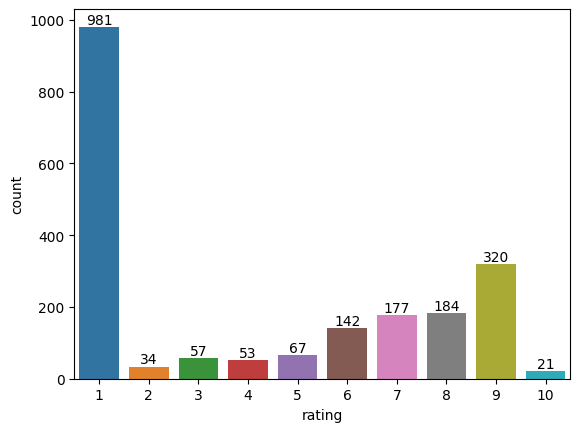

In [181]:
# a graph to represent the count of ratings
rating_count = sb.countplot(x="rating", data=movie_data)

for i in rating_count.containers:
  rating_count.bar_label(i)

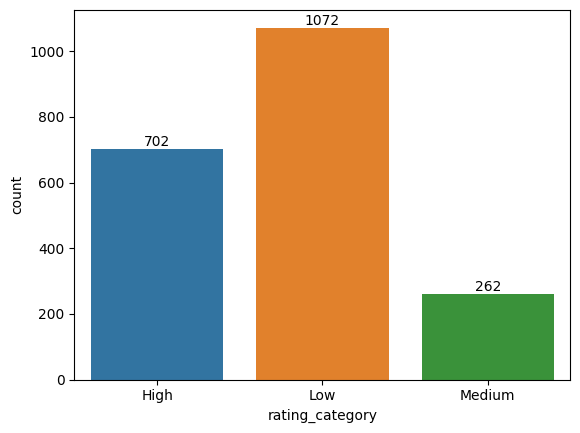

In [182]:
# a graph to show tha count of "raring_category"
rating_category_count = sb.countplot(x="rating_category", data=movie_data)

for i in rating_category_count.containers:
  rating_category_count.bar_label(i)

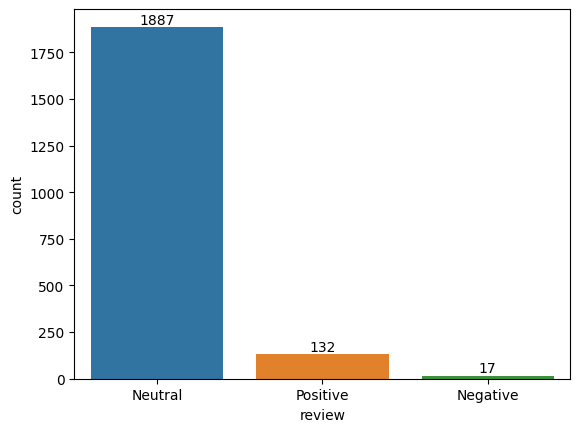

In [183]:
# a garph to show the count of review column
review_count = sb.countplot(x="review", data=movie_data)

for i in review_count.containers:
  review_count.bar_label(i)

<Axes: xlabel='rating_category', ylabel='rating'>

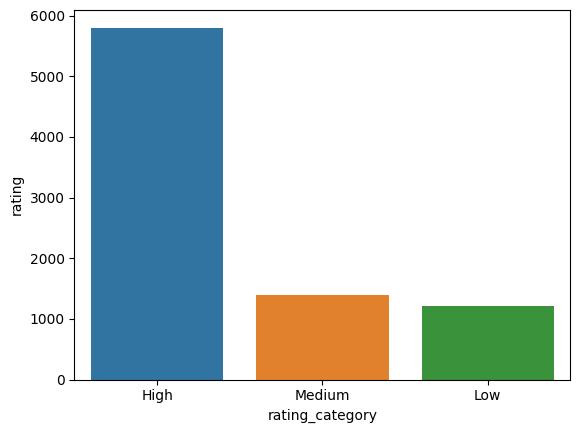

In [184]:
# grouping rating_category column based on the ratings
ratings_by_category = movie_data.groupby(["rating_category"], as_index=False)["rating"].sum().sort_values(by="rating", ascending=False)

sb.barplot(x="rating_category", y="rating", data=ratings_by_category)

<Axes: xlabel='review', ylabel='rating'>

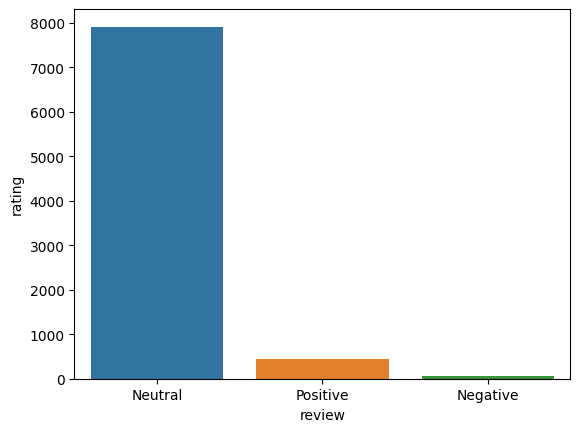

In [185]:
# grouping review column based on the ratings
review_by_ratings = movie_data.groupby(["review"], as_index=False)["rating"].sum().sort_values(by="rating", ascending=False)

sb.barplot(x="review", y="rating", data=review_by_ratings)

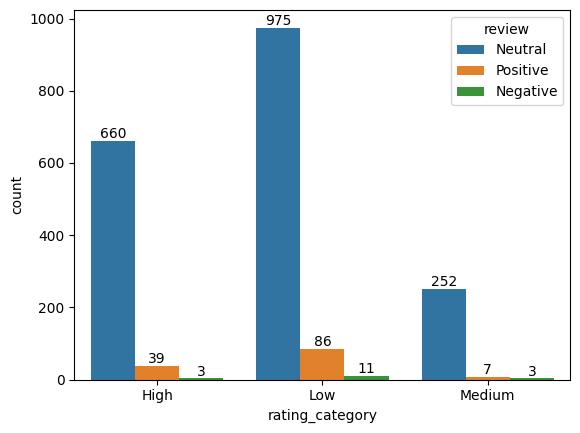

In [186]:
# grouping rating_category and review columns
category_by_review = sb.countplot(data=movie_data, x="rating_category", hue="review")

for i in category_by_review.containers:
    category_by_review.bar_label(i)